

# **Principal Component Analysis(PCA)**

### Neha Joseph  (100827187)

In [1]:
#Loading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data set
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#Splitting Features and Target variables
X = data.drop('species', axis = 1)
y = data['species']

In [5]:
#Key metrics for features
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Standardizing the features as they they different range.

In [6]:
#Standardizing the variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X)

In [7]:
# PCA with all the components (4)
from sklearn.decomposition import PCA
pca_4 = PCA(n_components=4)

# Determine transformed features
X_pca = pca_4.fit_transform(X_std)

In [8]:
print("Variance explained by all the 04 principal component = ", sum(pca_4.explained_variance_ratio_*100))


Variance explained by all the 04 principal component =  100.0


In [9]:
pca_4.explained_variance_ratio_*100

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

In [10]:
#Variance explained by each principaal components
np.cumsum(pca_4.explained_variance_ratio_*100)

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

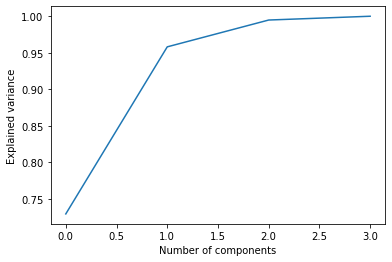

In [11]:
#creating plot for better understanding

plt.plot(np.cumsum(pca_4.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi= 100)
plt.show()

In [12]:
print("variance explained by first PC=", np.cumsum(pca_4.explained_variance_ratio_*100)[0])
print("variance explained by second PC=", np.cumsum(pca_4.explained_variance_ratio_*100)[1])
print("variance explained by third PC=", np.cumsum(pca_4.explained_variance_ratio_*100)[2])
print("variance explained by Fourth PC=", np.cumsum(pca_4.explained_variance_ratio_*100)[3])

variance explained by first PC= 72.96244541329989
variance explained by second PC= 95.81320720000163
variance explained by third PC= 99.48212908928451
variance explained by Fourth PC= 100.0


1st pc  explains 72.96%, 2nd PC variables explain 95.81%. 3rd PC explain 99.48% and all 4 explain 100%. 
 First two compomnents keep about 95.81% of variability 

# 

##### apply PCA to our dataset with n_components=0.95

In [13]:
# Perform PCA for 95% variance
pca_95 = PCA(n_components = 0.95, random_state=2)

# Determine transformed features
X_pca_95 = pca_95.fit_transform(X_std)

combining the X_pca_95, and the species column for raw data for training and testing any models.


In [1]:
#Final collated dataset with the 2 Principal components and target variable
data_new =pd.DataFrame(X_pca_95, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC2','PC1', 'PC2','PC1', 'PC2'])
data_new['species']= data.species
data_new.head()

NameError: name 'pd' is not defined

 2 of the features that can explain variability that is more than 95% is selected after the feature selection.